**Part - 2**

In [ ]:
import pandas as pd
import numpy as np
# Importing flight_price_prediction data from csv file
graph_data = pd.read_csv("flight_price_prediction.csv")
flight_data = pd.read_csv("flight_price_prediction.csv")
flight_data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
flight_data.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [ ]:
flight_data.shape

(300153, 12)

In [ ]:
flight_data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
flight_data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<BarContainer object of 6 artists>

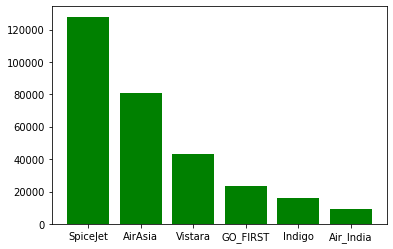

In [ ]:
# graph represents the no of flights by each airline
import matplotlib.pyplot as plt
n = graph_data["airline"].unique()
plt.bar(n,(graph_data["airline"]).value_counts(), color ='green')

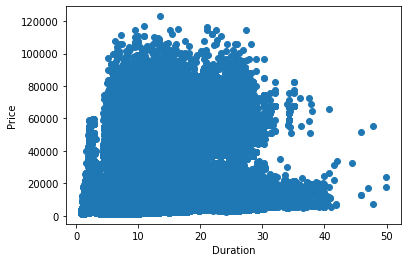

In [ ]:
# Scatter Plot of Flight Duration vs. Price
plt.scatter(graph_data['duration'], graph_data['price'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

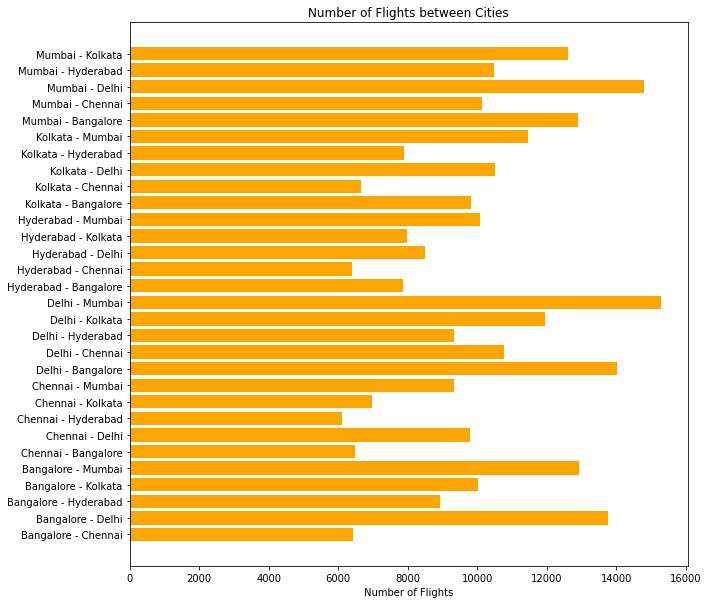

In [ ]:
# graph represents number of flights between two cities
total = graph_data.groupby(['source_city','destination_city']).count()['airline']
total = total.to_frame(name='fly_count')
total = total.reset_index()

plt.figure(figsize=(10, 10))
plt.barh(y=total['source_city'] + ' - ' + total['destination_city'],
         width=total['fly_count'], color='orange')
plt.xlabel('Number of Flights')
plt.title('Number of Flights between Cities')
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

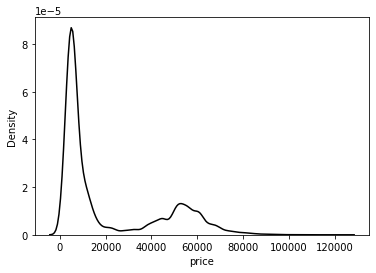

In [ ]:
import seaborn as sns
sns.kdeplot(graph_data['price'], color='black')

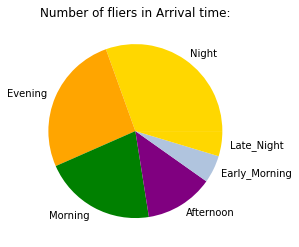

In [ ]:
class_counts = graph_data['arrival_time'].value_counts()
colors = ['gold', 'orange','Green', 'purple', 'LightSteelBlue']
class_counts.plot(kind='pie', colors=colors)
plt.title("Number of fliers in Arrival time:")
plt.ylabel('')
plt.show()

In [ ]:
graph_data = graph_data.drop(['Unnamed: 0','flight'], axis = 1)
graph_data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
# Checking for null values
print(flight_data.shape)
print(flight_data.isnull().sum())

(300153, 12)
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [ ]:
# Converting categorical to numerical data
name = {'SpiceJet': 0, 'AirAsia': 1, 'Vistara': 2, 'GO_FIRST': 3, 'Indigo': 4, 'Air_India':5}
flight_data['airline'] = flight_data['airline'].replace(name)

city = {'Delhi':0, 'Mumbai':1, 'Bangalore':2, 'Kolkata':3, 'Hyderabad':4, 'Chennai':5}
flight_data['source_city'] = flight_data['source_city'].replace(city)
flight_data['destination_city'] = flight_data['destination_city'].replace(city)

time = {'Evening':0, 'Early_Morning':1, 'Morning':2, 'Afternoon':3, 'Night':4, 'Late_Night':5}
flight_data['departure_time'] = flight_data['departure_time'].replace(time)
flight_data['arrival_time'] = flight_data['arrival_time'].replace(time)

stop = {'zero':0, 'one':1, 'two_or_more':2}
flight_data['stops'] = flight_data['stops'].replace(stop)

clas = {'Economy':0, 'Business':1}
flight_data['class'] = flight_data['class'].replace(clas)



In [ ]:
# Converting duration into seconds
def samayam(x):
  x = str(x)
  y = x.split('.')

  return int(y[0])*3600 + int(y[1])*60
flight_data["duration"] = flight_data["duration"].apply(samayam)



In [ ]:
# Normalizing duration and day_left columns by min and max technique.
mini = flight_data[['duration','days_left']].min()
maxi = flight_data[['duration','days_left']].max()

flight_data["duration"] = flight_data["duration"].apply(lambda x: (x - mini[0])/(maxi[0] - mini[0]))
flight_data["days_left"] = flight_data["days_left"].apply(lambda x: (x - mini[1])/(maxi[1] - mini[1]))

In [ ]:
# Removing the columns Unnamed and flight
fly_data = flight_data.drop(['Unnamed: 0','flight'], axis = 1)
fly_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,0,0,0,4,1,0,0.025987,0.0,5953
1,0,0,1,0,2,1,0,0.031387,0.0,5953
2,1,0,1,0,1,1,0,0.025987,0.0,5956
3,2,0,2,0,3,1,0,0.028687,0.0,5955
4,2,0,2,0,2,1,0,0.031387,0.0,5955
...,...,...,...,...,...,...,...,...,...,...
300148,2,5,2,1,0,4,1,0.184948,1.0,69265
300149,2,5,3,1,4,4,1,0.196423,1.0,77105
300150,2,5,1,1,4,4,1,0.271009,1.0,79099
300151,2,5,1,1,0,4,1,0.182248,1.0,81585


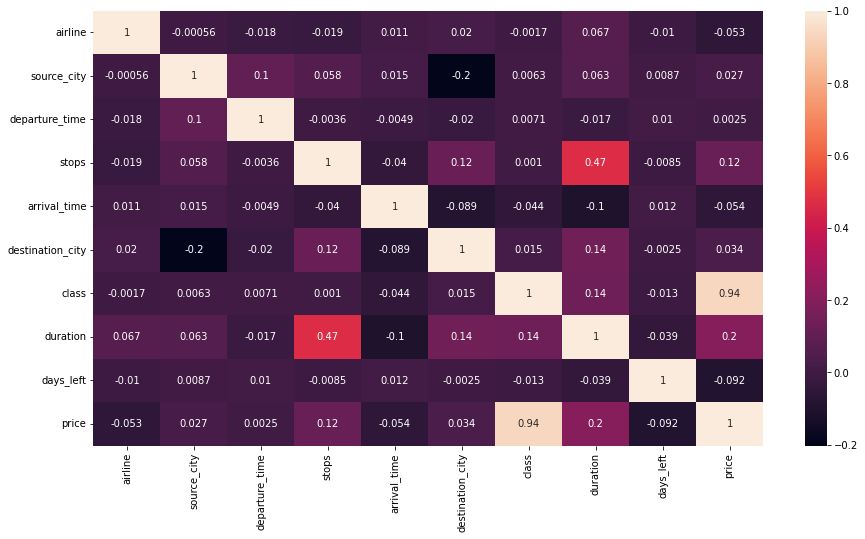

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(fly_data.corr(),annot=True)
plt.show()

In [ ]:
# Shuffling the data and dividing into input and target
shuffled_data = fly_data.sample(frac = 1,replace = False,random_state=7)
fly_y = (shuffled_data["price"]).to_numpy()
fly_x1 = (shuffled_data.drop("price",axis = 1)).to_numpy()
# adding an extra column to x for intercept
fly_x = np.column_stack((np.ones(len(fly_x1)), fly_x1))

In [ ]:
#splitting the data into test and train
n = fly_y.shape[0]
train = int(n*0.8)
FX_train = fly_x[0:train]
FX_test = fly_x[train:]
FY_train = fly_y[0:train]
FY_test = fly_y[train:]
print(FX_train.shape)
print(FX_test.shape)
print(FY_train.shape)
print(FY_test.shape)

(240122, 10)
(60031, 10)
(240122,)
(60031,)


In [ ]:
# Building Linear Regression class
class linear_regression():
  def __init__(self, iterations):
    # Takes as an input hyperparameters: learning rate and the number of iterations.
    #self.learning_rate = learning_rate
    self.iterations = iterations
    self.cost_values = []
  def predict(self,x):
    return np.dot(x,self.w)

  def cost(self):

    h = self.predict(self.x_train)

    return 0.5*np.dot((self.y_train - h).T,(self.y_train - h))


  #def gradient_descent(self):


  def fit(self,x_train,y_train,w):
    self.x_train = x_train
    self.y_train = y_train

    self.m = x_train.shape[0]
    self.n = x_train.shape[1]
    self.w = w
    #w = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
    for i in range(self.iterations):
      #self.gradient_descent()
      t = self.cost()
      self.cost_values.append(t)








In [ ]:
model2 = linear_regression(1)

In [ ]:
w = np.linalg.inv(FX_train.T.dot(FX_train)).dot(FX_train.T).dot(FY_train)
model2.fit(x_train = FX_train,y_train = FY_train,w = w)


In [ ]:
p = model2.predict(FX_test)

In [ ]:
tss = np.sum((FY_test - np.mean(FY_test))**2)
#residual sum of squares (RSS)
rss = np.sum((FY_test - p)**2)
#coefficient of determination (R-squared)
r2 = 1 - (rss / tss)
print('R-squared:', r2)
print('R-squared percentage:', r2*100)

R-squared: 0.9036887175723854
R-squared percentage: 90.36887175723855


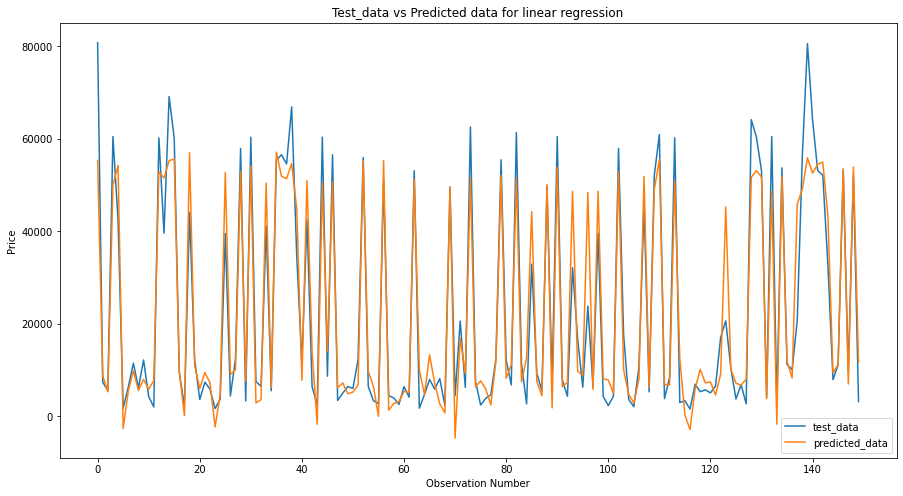

In [ ]:
data_points=150
plt.figure(figsize = (15,8))
x_axis = range(len(FY_test[:data_points]))
plt.plot(x_axis, FY_test[:data_points], label="test_data")
plt.plot(x_axis, p[:data_points], label="predicted_data")
plt.title("Test_data vs Predicted data for linear regression")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Test_data vs Predicted data for linear regression')

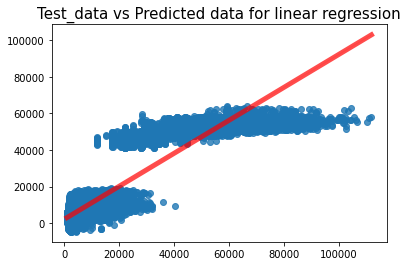

In [ ]:

sns.regplot(x=FY_test, y=p, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Test_data vs Predicted data for linear regression",fontsize = 15)

In [ ]:
import pickle
pickle.dump( model2.w, open( "save2.p", "wb" ) )

In [ ]:
model2.cost_values

[5992444885289.426]

**Part - 3**

**Ridge regression**

In [ ]:
# Building Ridge Regression class
class Ridge_regression():
  def __init__(self, iterations):
    # Takes as an input hyperparameters: learning rate and the number of iterations.
    #self.learning_rate = learning_rate
    self.iterations = iterations
    self.cost_values = []
  def predict(self,x):
    return np.dot(x,self.w)

  def cost(self):

    h = self.predict(self.x_train)

    return (0.5*np.dot((self.y_train - h).T,(self.y_train - h))) + 0.5*self.lam*np.dot(w.T,w)


  #def gradient_descent(self):


  def fit(self,x_train,y_train,w,lam):
    self.x_train = x_train
    self.y_train = y_train
    self.lam = lam
    self.m = x_train.shape[0]
    self.n = x_train.shape[1]
    self.w = w
    #w = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
    for i in range(self.iterations):
      #self.gradient_descent()
      t = self.cost()
      self.cost_values.append(t)

In [ ]:
model3 = Ridge_regression(1)

In [ ]:
s_i = FX_train.shape[1]
lam = 0.4
w = np.linalg.inv((FX_train.T.dot(FX_train))+ lam*np.identity(s_i)).dot(FX_train.T).dot(FY_train)
model3.fit(x_train = FX_train,y_train = FY_train,w = w,lam = lam)

In [ ]:
p1 = model3.predict(FX_test)

In [ ]:
model3.cost_values

[5992886713384.092]

Text(0.5, 1.0, 'Test_data vs Predicted data for linear regression')

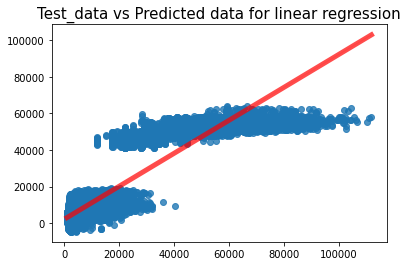

In [ ]:
sns.regplot(x=FY_test, y=p1, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Test_data vs Predicted data for linear regression",fontsize = 15)

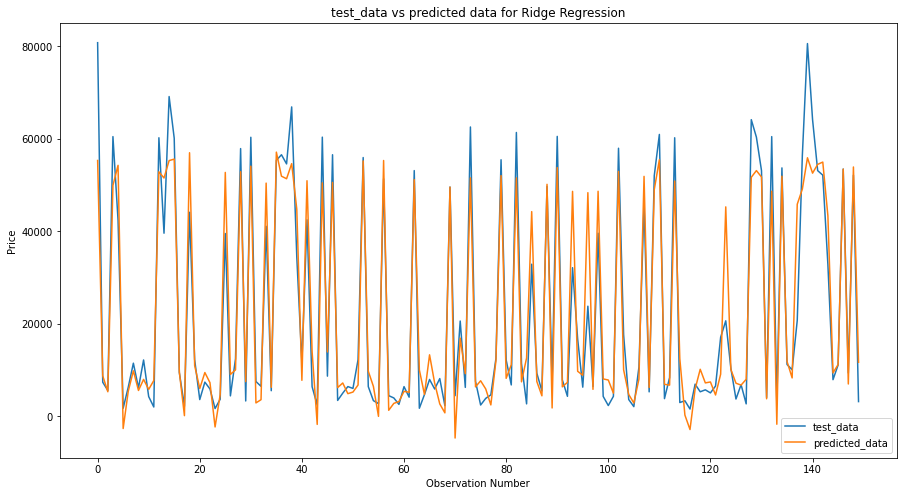

In [ ]:
data_points=150
plt.figure(figsize = (15,8))
x_axis = range(len(FY_test[:data_points]))
plt.plot(x_axis, FY_test[:data_points], label="test_data")
plt.plot(x_axis, p1[:data_points], label="predicted_data")
plt.title("test_data vs predicted data for Ridge Regression")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
tss1 = np.sum((FY_test - np.mean(FY_test))**2)
#residual sum of squares (RSS)
rss1 = np.sum((FY_test - p1)**2)
#coefficient of determination (R-squared)
r21 = 1 - (rss1 / tss1)
print('R-squared:', r21)
print('R-squared percentage:', r21*100)

R-squared: 0.9036886712140545
R-squared percentage: 90.36886712140544


In [ ]:
import pickle
pickle.dump( model3.w, open( "save3.p", "wb" ) )

In [ ]:
class ElasticRegression():

    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = None
        self.b = None

    def fit(self, x_train, y_train, w=None):
        self.m, self.n = x_train.shape

        if self.W is None:
            self.W = np.zeros(self.n) if w is None else w
        self.b = 0

        if w is not None:
            x_train = x_train * w.reshape(-1, 1)
            y_train = y_train * w

        for i in range(self.iterations):
            ypred = x_train.dot(self.W) + self.b
            Wi = np.zeros(self.n)

            for j in range(self.n):
                Wi[j] = - (2 * (x_train[:,j]).dot(y_train - ypred)) / self.m

            val = - 2 * np.sum(y_train - ypred) / self.m
            self.W = self.W - self.learning_rate * Wi
            self.b = self.b - self.learning_rate * val

        return self

    def predict(self, x_train):
        return x_train.dot(self.W) + self.b

In [ ]:
model4 = ElasticRegression()

In [ ]:
w = np.linalg.inv(FX_train.T.dot(FX_train)).dot(FX_train.T).dot(FY_train)
model4.fit(x_train = FX_train,y_train= FY_train)


In [ ]:

y_pred = model4.predict(x_train = FX_test)

In [ ]:
y_pred

array([54176.12871915,  9480.60647349,  6241.73086298, ...,
        -636.94450149,  9129.02996672,  8501.12259439])

In [ ]:
mse = np.mean((y_pred - FY_test)**2)
rmse = np.sqrt(mse)
r2 = 1 - mse/np.var(FY_test)

In [ ]:
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R-squared: ", r2)

Mean Squared Error:  50110558.97692902
Root Mean Squared Error:  7078.88119528284
R-squared:  0.9031585394928471


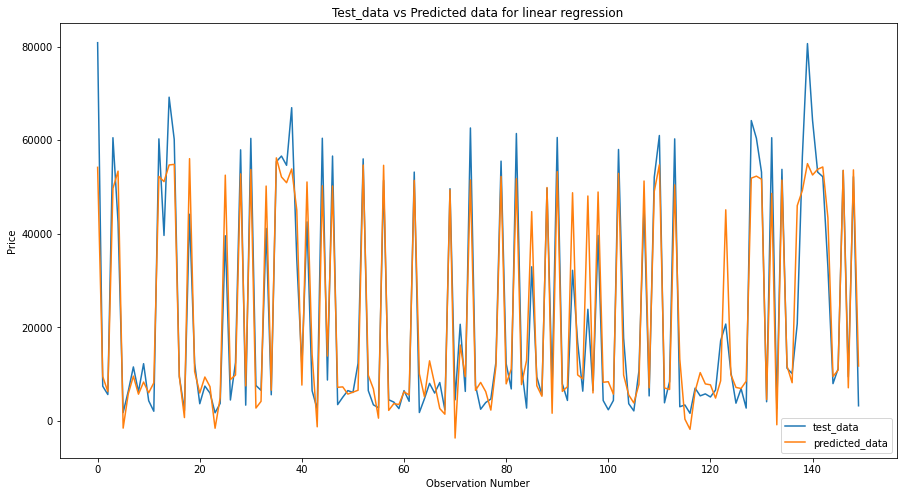

In [ ]:

plt.figure(figsize = (15,8))
x_axis = range(len(FY_test[:data_points]))
plt.plot(x_axis, F:data_points], label="test_data")
plt.plot(x_axis, y_pred[:data_points], label="predicted_data")
plt.title("Test_data vs Predicted data for linear regression")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import pickle
pickle.dump( model4.W, open( "save4.p", "wb" ) )

In [ ]:
reference:
https://www.geeksforgeeks.org/implementation-of-elastic-net-regression-from-scratch/